# Make new compositional diagrams

In [1]:
import flashalgorithm as fc
import numpy as np
import dill as pickle
import itertools as itool
import pdb
import matplotlib.pyplot as plt
import time

In [2]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum((x[4][0][:, 1] - x[4][0][:, 2])**2) < 1e-8:
        if (x[4][1][1] > x[4][1][2]) and (x[4][1][1] > 1e-10):
            index_get.append(2)
        elif (x[4][1][2] > 1e-10):
            index_get.append(2)
    else:
        if x[4][1][1] > 1e-10:
            index_get.append(1)
        if x[4][1][2] > 1e-10:
            index_get.append(2)
    for ii in [0, 3, 4]:
        if x[4][1][ii] > 1e-10:
            index_get.append(ii)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'gray'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        else:
            color = 'burgundy'
    return index_get, color
def sr2xy(c1, c2=None):
    if type(c1) == np.ndarray:
        x = c1[:, 0] + 0.5 * c1[:, 1]
        y = c1[:, 1] * (np.sqrt(3.0) / 2.0)
        return np.transpose(np.vstack([x, y]))
    else:
        x = c1 + 0.5 * c2
        y = c2 * (np.sqrt(3.0) / 2.0)
        return x, y
def xy2sr(x, y=None):
    if type(x) == np.ndarray:
        c2 = x[:, 1] * (2.0 / np.sqrt(3.0))
        c1 = x[:, 0] - 0.5 * c2
        c3 = 1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3]))
    else:
        c2 = y * (2.0 / np.sqrt(3.0))
        c1 = x - 0.5 * c2
        c3 = 1 - c2 - c1
        return c1, c2, c3
def ctoxyz(c1, c2=None, c3=None):
    if type(c1) == np.ndarray:
        x = 0.5 * (c1[:, 0] + c1[:, 2]) + c1[:, 1]
        y = c1[:, 0] * (np.sqrt(3.0) / 2.0) + c1[:, 2] * (1 / (2.0 * np.sqrt(3.0)))
        z = c1[:, 0] * np.sqrt(2.0 / 3.0)
        return np.transpose(np.vstack([x, y, z]))
    else:
        x = 0.5 * (c1 + c3) + c2
        y = c1 * (np.sqrt(3.0) / 2.0) + c3 * (1 / (2.0 * np.sqrt(3.0)))
        z = c3 * np.sqrt(2.0 / 3.0)
        return x, y, z
def xyztoc(x, y=None, z=None):
    if type(x) == np.ndarray:
        c3 = x[:, 2] * np.sqrt(3.0 / 2.0)
        c1 = (x[:, 1] - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x[:, 0] - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return np.transpose(np.vstack([c1, c2, c3, c4]))
    else:
        c3 = z * np.sqrt(3.0 / 2.0)
        c1 = (y - c3 * (1 / (2.0 * np.sqrt(3.0)))) * (2.0 / np.sqrt(3.0))
        c2 = x - 0.5 * (c1 + c3)
        c4 = 1 - c1 - c2 - c3
        return c1, c2, c3, c4

color_dict = {0: 'blue',
              1: 'red',
              2: 'purple',
              3: 'black',
              4: 'orange'}

In [3]:
data_str = '80bar12C'
data = []
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Aqs1s2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Aqs1s2_nearc1.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Aqs1s2_nearc1_pt2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_LVs1.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_LVs2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_AqLs2.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_AqLs1.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_70bar6C_3phase_quick_Ls1s2.pkl', 'rb'))





data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_LVs2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_AqLs1.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_AqLs2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_Ls1s2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_Aqs1s2.pkl', 'rb'))
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_nearc1.pkl', 'rb')) # Produces Aq-V/L-s2
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase.pkl', 'rb'))
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase2.pkl', 'rb'))  # Not useful
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase3.pkl', 'rb'))  # Not useful
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase4.pkl', 'rb'))  # Not useful
data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase5.pkl', 'rb'))  # Useful for filling in Aqs1s2
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase6.pkl', 'rb'))  # Useful, but redundant
# data += pickle.load(open('c1toc3_flashtable_80bar12C_3phase_quick_find4phase7.pkl', 'rb'))  # Useful, but redundant
#DONE: Drop Bad compositions: x[0] = 170, 171 of quick_nearc1...they both produce L-V-s2, when independent analysis suggest Aq-V/L-s2
#DONE: Drop Bad compositions x[0] = 5168 of pt_new1...totally erroneous.
#DONE: Remove bad compositions nearc1 of pt_new1 if propane != 0.
#TODO: Add zero propane Aq-L/V-s2 because it is absent.
data += pickle.load(open('80bar12C_addedcomps_1pt.pkl', 'rb'))
threep_data = [x for x in data if (x[4] != []) and (x[-1][-1] < 4e-5)]

data += pickle.load(open('c1toc3_flashtable_' + data_str + '_pt_new1.pkl', 'rb'))
all3_data = [x for x in data if (x[4] != []) and (x[-1][-1] < 4e-5)]
really_broken = [x for x in data if x[4] == []]
broken = [x for x in data if (x[4] != []) and ((x[-1][-1] > 1e-6) or (x[-1][-1] == 100))]

In [4]:
len(all3_data)
all3_data[-2:]
max_h2o = np.max([x[4][0][0,:] for x in all3_data])
min_h2o = np.min([x[4][0][0,:] for x in all3_data])
h2o_stats = {'max': max_h2o, 'min': min_h2o}
print(h2o_stats)

{'max': 0.99968153952557504, 'min': 0.00012846076728059092}


In [5]:
def make_ref_list(data):
    phase_stable_lookup = dict()
    type_ref_list = list()
    phase_type = 0
    for ii, x in enumerate(data):
        index_get, color = get_stable_phases(x)
        if sorted(index_get) in type_ref_list:
            phase_stable_lookup[type_ref_list.index(sorted(index_get))]['inds'].append(ii)
        else:
            phase_stable_lookup[phase_type] = {'phases': sorted(index_get), 'inds': [ii], 'color': color}
            phase_type += 1
            type_ref_list.append(sorted(index_get))
    return type_ref_list, phase_stable_lookup
type_ref_list, phase_stable_lookup = make_ref_list(all3_data)

In [6]:
def plot_tern_lines(x, tern_inds=[0,1,2]):
    z = x[4][0]
    absent_ind = [ind for ind in range(4) if ind not in tern_inds].pop()
    if (np.sum(x[1][tern_inds]) == 1) or (x[1][absent_ind] == 0.0):
        index_get, color = get_stable_phases(x)
        if x[-1][-1] < 5e-5:
            if (len(index_get) == 2) and (color != 'black'):
                if (len(z) == 3) or (x[1][tern_inds[2]] == 0.0):
                    x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                    x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                else:
                    x1, y1 = sr2xy(0, z[0, index_get[0]])
                    x2, y2 = sr2xy(0, z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
            elif len(index_get) == 3:
                pdb.set_trace()
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')
                
def plot_3d_tietri(index_interest, color, tie=False):
    x_line = dict([('1', []), ('2', []), ('3', [])])
    y_line = dict([('1', []), ('2', []), ('3', [])])
    z_line = dict([('1', []), ('2', []), ('3', [])])
    triangles = list()
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[-1][-1] < 5e-5):
                z = x[4][0]
                if (len(z) == 4) or (x[1][3] == 0):
                    x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][2] == 0.0:
                    x1, y1, z1 = ctoxyz(0, z[1, index_interest[0]], z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(0, z[1, index_interest[1]], z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(0, z[1, index_interest[2]], z[0, index_interest[2]])
                elif x[1][1] == 0.0:
                    x1, y1, z1 = ctoxyz(z[1, index_interest[0]], 0, z[0, index_interest[0]])
                    x2, y2, z2 = ctoxyz(z[1, index_interest[1]], 0, z[0, index_interest[1]])
                    x3, y3, z3 = ctoxyz(z[1, index_interest[2]], 0, z[0, index_interest[2]])
                triangles.append([[x1, x2, x3, x1], [y1, y2, y3, y1], [z1, z2, z3, z1]])
                z_line['1'].append(z1)
                z_line['2'].append(z2)
                z_line['3'].append(z3)

                y_line['1'].append(y1)
                y_line['2'].append(y2)
                y_line['3'].append(y3)

                x_line['1'].append(x1)
                x_line['2'].append(x2)
                x_line['3'].append(x3)

        if (x_line['1'] != []):
            if tie:
                for tietri in triangles:
                    ax.plot(tietri[0], tietri[1], tietri[2], '-', color=color)
            ax.plot(x_line['1'], y_line['1'], z_line['1'], '.', color=color_dict[index_interest[0]])
            ax.plot(x_line['2'], y_line['2'], z_line['2'], '.', color=color_dict[index_interest[1]])
            ax.plot(x_line['3'], y_line['3'], z_line['3'], '.', color=color_dict[index_interest[2]])
            
def plot_3d_4phase(index_interest):
    if sorted(index_interest) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 1000) and (x[-1][-1] < 5e-5):
                z = x[4][0]
                x1, y1, z1 = ctoxyz(z[2, index_interest[0]], z[1, index_interest[0]], z[0, index_interest[0]])
                x2, y2, z2 = ctoxyz(z[2, index_interest[1]], z[1, index_interest[1]], z[0, index_interest[1]])
                x3, y3, z3 = ctoxyz(z[2, index_interest[2]], z[1, index_interest[2]], z[0, index_interest[2]])
                x4, y4, z4 = ctoxyz(z[2, index_interest[3]], z[1, index_interest[3]], z[0, index_interest[3]])
                ax.plot([x1, x2], [y1, y2], [z1, z2], '-', color='pink')
                ax.plot([x2, x3], [y2, y3], [z2, z3], '-', color='pink')
                ax.plot([x3, x1], [y3, y1], [z3, z1], '-', color='pink')
                ax.plot([x4, x1], [y4, y1], [z4, z1], '-', color='pink')
                ax.plot([x4, x2], [y4, y2], [z4, z2], '-', color='pink')
                ax.plot([x4, x3], [y4, y3], [z4, z3], '-', color='pink')
def plot_pseudo_4phase(index_mod):
    if sorted(index_mod) in type_ref_list:
        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_mod))]['inds']]
        for x in data_subset[0:1]:
            if (x[4][3] != 10-0) and (x[-1][-1] < 1e-5):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                x1, y1 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                x2, y2 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                x3, y3 = sr2xy(z_p[0, index_mod[2]], z_p[2, index_mod[2]])
                x4, y4 = sr2xy(z_p[0, index_mod[3]], z_p[2, index_mod[3]])
                plt.plot([x1, x2], [y1, y2], '--', color='pink')
                plt.plot([x2, x3], [y2, y3], '--', color='pink')
                plt.plot([x3, x1], [y3, y1], '--', color='pink')
                plt.plot([x4, x1], [y4, y1], '--', color='pink')
                plt.plot([x4, x2], [y4, y2], '--', color='pink')
                plt.plot([x4, x3], [y4, y3], '--', color='pink')
def plot_pseudo_tern(index_interest):
    if sorted(index_interest) in type_ref_list:
        x_line = dict([('0', []), ('1', []), ('2', [])])
        y_line = dict([('0', []), ('1', []), ('2', [])])
    #     triangles = list()
#         index_mod = [ind for ind in index_interest if ind !=0]
        index_mod = [ind for ind in index_interest]

        data_subset = [all3_data[ii] for ii in phase_stable_lookup[type_ref_list.index(sorted(index_interest))]['inds']]
        for x in data_subset:
            if (x[4][3] != 1000) and (x[-1][-1] < 5e-5):
                z = x[4][0]
                z_p = z[1:, :] / np.sum(z[1:, :], 0)[np.newaxis, :]
                if (len(z_p) == 3):
                        x0, y0 = sr2xy(z_p[0, index_mod[0]], z_p[2, index_mod[0]])
                        x1, y1 = sr2xy(z_p[0, index_mod[1]], z_p[2, index_mod[1]])
                        if len(index_mod) == 3:
                            x2, y2 = sr2xy(z_p[0, index_mod[2]], z_p[2, index_mod[2]])
                else:
                    if x[1][2] == 0.0:
                            x0, y0 = sr2xy(z_p[0, index_mod[0]], z_p[1, index_mod[0]])
                            x1, y1 = sr2xy(z_p[0, index_mod[1]], z_p[1, index_mod[1]])
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(z_p[0, index_mod[2]], z_p[1, index_mod[2]])
                    elif x[1][1] == 0.0:
                            x0, y0 = sr2xy(0, z_p[1, index_mod[0]])
                            x1, y1 = sr2xy(0, z_p[1, index_mod[1]])
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(0, z_p[1, index_mod[2]])
                    elif x[1][3] == 0.0:
                            x0, y0 = sr2xy(z_p[0, index_mod[0]], 0)
                            x1, y1 = sr2xy(z_p[0, index_mod[1]], 0)
                            if len(index_mod) == 3:
                                x2, y2 = sr2xy(z_p[0, index_mod[2]], 0) 
                y_line['0'].append(y0)
                y_line['1'].append(y1)
                if len(index_mod) == 3:
                    y_line['2'].append(y2)
                x_line['0'].append(x0)
                x_line['1'].append(x1)
                if len(index_mod) == 3:
                    x_line['2'].append(x2)
        if (x_line['1'] != []):
            plt.plot(x_line['0'], y_line['0'], '.', color=color_dict[index_mod[0]])
            plt.plot(x_line['1'], y_line['1'], '.', color=color_dict[index_mod[1]])
            if len(index_mod) == 3:
                plt.plot(x_line['2'], y_line['2'], '.', color=color_dict[index_mod[2]])

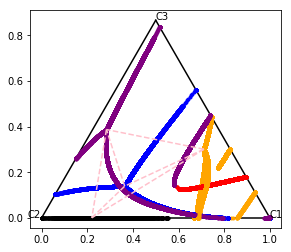

In [7]:
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')

# Excess Water Terns
plot_pseudo_tern([0, 1, 3])
plot_pseudo_tern([0, 2, 3])
plot_pseudo_tern([0, 1, 4])
plot_pseudo_tern([0, 2, 4])
plot_pseudo_tern([3, 4, 0])
plot_pseudo_tern([0, 1, 2])


# Excess Gas Terns
plot_pseudo_tern([1, 2, 3])
plot_pseudo_tern([1, 3, 2])
plot_pseudo_tern([1, 2, 4])
plot_pseudo_tern([4, 2, 1])


plot_pseudo_tern([1, 4, 2])
plot_pseudo_tern([1, 3, 4])
plot_pseudo_tern([2, 3, 4])
plot_pseudo_tern([1, 4, 3])
plot_pseudo_tern([2, 4, 3])
plot_pseudo_tern([0, 1, 2])

# Possible 4-phase
plot_pseudo_4phase([1, 2, 3, 4])
plot_pseudo_4phase([0, 2, 3, 4])
plot_pseudo_4phase([0, 1, 3, 4])
plot_pseudo_4phase([0, 1, 2, 3])
plot_pseudo_4phase([0, 1, 2, 4])










plt.axis('scaled')
plt.text(-0.06, 0, 'C2')
plt.text(1.0, 0, 'C1')
plt.text(0.5, 0.87, 'C3')

# plt.ylim([0.7, 0.85])
# plt.xlim([0.4, 0.6])

# plt.ylim([-0.01, 0.05])
# plt.xlim([0.95, 1.05])

# plt.ylim([-0.01, 0.1])
# plt.xlim([0.8, 1.1])

# plt.ylim([-0.01, 0.05])
# plt.xlim([0.5, 0.8])

# plt.ylim([0.24, 0.3])
# plt.xlim([0.12, 0.2])



plt.savefig('80bar12C_ptern.svg')
plt.show()

> <ipython-input-6-fb63836f0327>(18)plot_tern_lines()
-> x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
(Pdb) c
> <ipython-input-6-fb63836f0327>(18)plot_tern_lines()
-> x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
(Pdb) q


BdbQuit: 

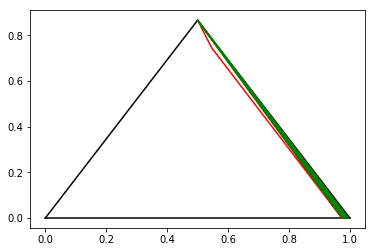

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
c1c2_inds = [0, 1, 2]
c1c3_inds = [0, 1, 3]
c2c3_inds = [0, 2, 3]
tern_inds = c1c2_inds
for x in all3_data:
    plot_tern_lines(x, tern_inds=tern_inds)
# extra_data = pickle.load(open('c1c3_1comp.pkl', 'rb'))
# plot_tern_lines([0, 0, 0, 0, extra_data])
plt.axis('scaled')
# plt.text(-0.06, 0, 'C' + str(tern_inds[2]))
# plt.text(1.0, 0, 'C' + str(tern_inds[1]))



# plt.ylim([0.7, 0.85])
# plt.xlim([0.4, 0.6])

# plt.ylim([0.85, 0.88])
# plt.xlim([0.48, 0.52])

plt.ylim([0.864, 0.866])
plt.xlim([0.498, 0.502])

# plt.ylim([-0.01, 0.4])
# plt.xlim([0.8, 1.1])
plt.savefig('c2c3_80bar12C.svg')
plt.show()

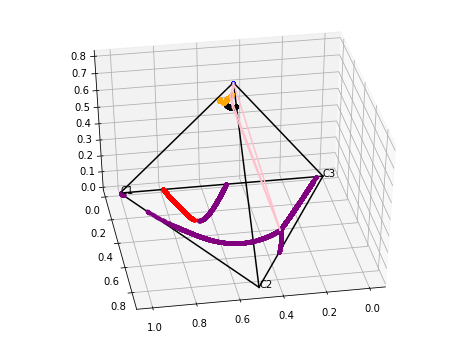

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import itertools as itool
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
vertices = [[1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]]
pts = [ctoxyz(x[0], x[1], x[2]) for x in vertices]
pt_pairs = itool.combinations(range(4), 2)
for pair in pt_pairs:
    ax.plot([pts[pair[0]][0], pts[pair[1]][0]],
            [pts[pair[0]][1], pts[pair[1]][1]],
            [pts[pair[0]][2], pts[pair[1]][2]], 'k-')
ax.text(pts[0][0], pts[0][1], pts[0][2], 'C2')
ax.text(pts[1][0], pts[1][1], pts[1][2], 'C1')
ax.text(pts[3][0], pts[3][1], pts[3][2], 'C3')


plot_3d_tietri([0, 1, 3], 'orange', tie=False)
plot_3d_tietri([0, 1, 4], 'red', tie=False)
plot_3d_tietri([1, 3, 4], 'blue', tie=False)
plot_3d_tietri([2, 3, 4], 'brown', tie=False)
plot_3d_tietri([0, 1, 2], 'green', tie=False)
plot_3d_tietri([1, 2, 4], 'teal', tie=False)
plot_3d_tietri([1, 2, 3], 'olive', tie=False)
plot_3d_tietri([0, 3, 4], 'gray', tie=False)
plot_3d_tietri([0, 2, 4], 'gray', tie=False)
plot_3d_tietri([0, 2, 3], 'purple', tie=False)


plot_3d_4phase([1, 2, 3, 4])
plot_3d_4phase([0, 2, 3, 4])
plot_3d_4phase([0, 1, 3, 4])






ax.view_init(40, 80)
plt.savefig('3d_view1_80bar12C.svg')
plt.show()

In [10]:
ref_list, phase_stable_lookup = make_ref_list(all3_data)
zip(range(len(ref_list)),ref_list)

[(0, [1, 2, 4]),
 (1, [1, 4]),
 (2, [2, 4]),
 (3, [0, 2, 3, 4]),
 (4, [0, 2, 3]),
 (5, [0, 2, 4]),
 (6, [2, 3, 4]),
 (7, [2, 3]),
 (8, [0, 2]),
 (9, [0, 3, 4]),
 (10, [0, 4]),
 (11, [0, 3])]

In [11]:
index_get = 5
data_subset = [all3_data[i] for i in phase_stable_lookup[index_get]['inds']]
# [x for x in data_subset if x[0] == 67]

In [12]:
index_mdpt = ref_list[index_get]
comp_ind_dict = {'water': 0,
                 'methane': 1,
                 'ethane': 2,
                 'propane': 3}
        
def make_midpoint(xx, index):
    mean_pts = np.mean(xx[4][0][:, index], axis=1)
    if len(xx[2]) == 4:
        return mean_pts
    else:
        result = np.zeros([4])
        for ii in range(len(xx[2])):
            result[comp_ind_dict[xx[2][ii]]] = mean_pts[ii]
        return result
    
def make_full_mat(xx, index):
    data_mod = xx[4][0][:, index]
    if len(xx[2]) == 4:
        return data_mod
    else:
        result = np.zeros([4, len(index)])
        for ii in range(len(xx[2])):
            result[comp_ind_dict[xx[2][ii]], :] = data_mod[ii, :]
        return result
    
def prepare_3phase_data(data):
    phase_zone_dict = dict()
    ii = 0
    jj = 0
    ref_list, phase_stable_lookup = make_ref_list(data)
    while ii < len(ref_list):
        phase_inds = ref_list[ii]
        if len(phase_inds) == 3:
            data_subset = [data[i] for i in phase_stable_lookup[ii]['inds']]
            data_subsetfull = np.asarray([make_full_mat(x, phase_inds) for x in data_subset])
            reduce_cond = np.ones([len(data_subsetfull)], dtype=bool)
            
            # Manually setting up the reduce condition
            if phase_inds == [0, 2, 4]:
                data_mdpt = np.mean(data_subsetfull, axis=2)
                reduce_cond = data_mdpt[:, 1] / np.sum(data_mdpt[:, 1:], axis=1) > 0.8
                data_3phase = np.unique(data_subsetfull[reduce_cond, :, :], axis=0)
                data_3phase = data_3phase[np.argsort(np.unique(data_3phase, axis=2)[:, 1, 1]), :, :]
                phase_zone_dict[jj] = {'inds': phase_inds,
                                       'data': data_3phase,
                                       'h2o_stats': {'max': np.max(data_3phase[0,:,:]), 
                                                     'min': np.min(data_3phase[0,:,:])}}
                jj += 1
                
                data_3phase = np.unique(data_subsetfull[~reduce_cond, :, :], axis=0)
                data_3phase = data_3phase[np.argsort(np.unique(data_3phase, axis=2)[:, 1, 1]), :, :]
                phase_zone_dict[jj] = {'inds': phase_inds,
                                       'data': data_3phase,
                                       'h2o_stats': {'max': np.max(data_3phase[0,:,:]), 
                                                     'min': np.min(data_3phase[0,:,:])}}
                jj += 1
            else:   
                data_3phase = np.unique(data_subsetfull[reduce_cond, :, :], axis=0)
                data_3phase = data_3phase[np.argsort(data_3phase[:, 1, 1]), :, :]
                phase_zone_dict[jj] = {'inds': phase_inds,
                                       'data': data_3phase,
                                       'h2o_stats': {'max': np.max(data_3phase[0,:,:]), 
                                                     'min': np.min(data_3phase[0,:,:])}}
                jj += 1
        ii += 1
    return phase_zone_dict

def prepare_2phase_data(data):
    phase_zone_dict = dict()
    ii = 0
    jj = 0
    ref_list, phase_stable_lookup = make_ref_list(data)
    while ii < len(ref_list):
        phase_inds = ref_list[ii]
        if len(phase_inds) == 2:
            data_subset = [data[i] for i in phase_stable_lookup[ii]['inds']]
            data_subsetfull = np.asarray([make_full_mat(x, phase_inds) for x in data_subset])
            data_2phase = np.unique(data_subsetfull, axis=0)
            data_2phase = data_2phase[np.argsort(np.unique(data_2phase, axis=2)[:, 1, 1]), :, :]
            phase_zone_dict[jj] = {'inds': phase_inds,
                                   'data': data_2phase,
                                   'h2o_stats': {'max': np.max(data_2phase[0,:,:]), 
                                                 'min': np.min(data_2phase[0,:,:])}}
            jj += 1
        ii += 1
    return phase_zone_dict

def prepare_4phase_data(data):
    phase_zone_dict = dict()
    ii = 0
    jj = 0
    ref_list, phase_stable_lookup = make_ref_list(data)
    while ii < len(ref_list):
        phase_inds = ref_list[ii]
        if len(phase_inds) == 4:
            data_subset = [data[i] for i in phase_stable_lookup[ii]['inds']]
            data_subsetfull = np.asarray([make_full_mat(x, phase_inds) for x in data_subset])
            data_4phase = np.mean(data_subsetfull, axis=0)
            phase_zone_dict[jj] = {'inds': phase_inds,
                                   'data': data_4phase,
                                   'h2o_stats': {'max': np.max(data_4phase[0,:]), 
                                                 'min': np.min(data_4phase[0,:])}}
            jj += 1
        ii += 1
    return phase_zone_dict
# from numpy.linalg import norm

# def area(a, b, c) :
#     return 0.5 * norm( np.cross( b-a, c-a ) )
# data_subsetfull = np.asarray([make_full_mat(x, index_mdpt) for x in data_subset])
# data_mdpt = np.mean(data_subsetfull, axis=2)
# reduce_cond = np.ones([len(data_mdpt)], dtype=bool) 
# reduce_cond = ((data_subsetfull[:, 3, 0] / np.sum(data_subsetfull[:, 1:,0], axis=1) < 1e-5) 
#                & (data_subsetfull[:, 1, 0] / np.sum(data_subsetfull[:, 1:,0], axis=1) > 0.8))
# reduce_cond = data_mdpt[:, 1] / np.sum(data_mdpt[:, 1:], axis=1) > 0.8

# data_mdpt = np.unique(data_mdpt[reduce_cond, :], axis=0)
# data_3phase = np.unique(data_subsetfull[reduce_cond, :, :], axis=2)
# all_data_cond = [data_subset[ii] for ii, cond in enumerate(reduce_cond) if cond]
# # all_data_cond
# # list_of_bad = [x[0] for x in all_data_cond]
# # pickle.dump(list_of_bad, open('remove_list.pkl', 'w'))
# data_mdpt
# # start_pt = np.mean(data_mdpt[-10:-9,:], axis=0)
# # new_frac = 0.61
# # old_frac = start_pt[0]
# # new_pt = np.asarray([new_frac, 
# #                     (1-new_frac)*start_pt[1]/old_frac,
# #                     (1-new_frac)*start_pt[2]/old_frac,
# #                      (1-new_frac)*start_pt[3]/old_frac])
# data_mpdt = data_mdpt[np.argsort(data_mdpt[:, 1]), :]
# data_3phase = data_3phase[np.argsort(data_3phase[:, 1, 1]), :, :]
phase_3_dict = prepare_3phase_data(threep_data)
phase_2_dict = prepare_2phase_data(all3_data)
phase_4_dict = prepare_4phase_data(all3_data)

In [13]:
# pickle.dump(data_mdpt, open('practice_three_phase_data.pkl', 'w'))

In [14]:
[(key, phase_2_dict[key]['inds'], len(phase_2_dict[key]['data'])) for key in phase_2_dict.keys()]

[(0, [1, 4], 123),
 (1, [2, 4], 16762),
 (2, [2, 3], 2606),
 (3, [0, 2], 1730),
 (4, [0, 4], 1248),
 (5, [0, 3], 279)]

In [15]:
[(key, phase_3_dict[key]['inds'], len(phase_3_dict[key]['data'])) for key in phase_3_dict.keys()]

[(0, [1, 2, 4], 1052),
 (1, [0, 2, 3], 139),
 (2, [0, 2, 4], 239),
 (3, [0, 2, 4], 110),
 (4, [2, 3, 4], 487),
 (5, [0, 3, 4], 3183)]

In [18]:
[x for x in phase_3_dict[2]['data']]

[array([[  9.98076559e-01,   2.61118317e-04,   8.60927628e-01],
        [  1.87940544e-03,   9.73689994e-01,   1.15661384e-01],
        [  4.40354993e-05,   2.60488878e-02,   2.34109877e-02],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 array([[  9.98076559e-01,   2.61118310e-04,   8.59514022e-01],
        [  1.87940547e-03,   9.73690008e-01,   1.18073541e-01],
        [  4.40354711e-05,   2.60488739e-02,   2.24124366e-02],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 array([[  9.98075952e-01,   2.61193076e-04,   8.58614515e-01],
        [  1.88435711e-03,   9.76287032e-01,   1.21096098e-01],
        [  3.96739175e-05,   2.34393768e-02,   2.01959751e-02],
        [  1.70348594e-08,   1.23984063e-05,   9.34119340e-05]]),
 array([[  9.98075936e-01,   2.61195750e-04,   8.58614114e-01],
        [  1.88451350e-03,   9.76368917e-01,   1.21103065e-01],
        [  3.95214303e-05,   2.33484452e-02,   2.01212391e-02],
        [  2.94624650e-08,   2.144

In [19]:
# bad_index = dict()
# for key in phase_2_dict:
#     bad_index[key] = []
#     for ii, tie_line in enumerate(phase_2_dict[key]['data']):
#         z = np.mean(tie_line, axis=1)
#         result = quick_flash(z, phase_2_dict, phase_3_dict, phase_4_dict, h2o_stats)
#         if len(result[0]) > 2:
#             bad_index[key].append(ii)
# pickle.dump(bad_index, open('bad_indices_2phase.pkl', 'wb'))
bad_index = pickle.load(open('bad_indices_2phase.pkl', 'r'))

In [20]:
if 'bad_data_removed' not in phase_2_dict[0].keys():
    for key in phase_2_dict:
        mask_array = np.ones(len(phase_2_dict[key]['data']), dtype=bool)
        mask_array[bad_index[key]] = False
        phase_2_dict[key]['data'] = phase_2_dict[key]['data'][mask_array, :]
        phase_2_dict[key]['bad_data_removed'] = True

In [21]:
for key_2p in phase_2_dict:
    inds_2p = phase_2_dict[key_2p]['inds']
    for key_3p in phase_3_dict:
        inds_3p = phase_3_dict[key_3p]['inds']
        overlap = set(inds_2p) & set(inds_3p)
        if len(overlap)==2:
            map_2pto3p = dict()
            for ii, ind_2p in enumerate(inds_2p):
                for jj, ind_3p in enumerate(inds_3p):
                    if ind_2p == ind_3p:
                        map_2pto3p[ii] = jj
            addl_data = np.zeros((len(phase_3_dict[key_3p]['data']), 4, 2))
            addl_data[:, :, 0] = phase_3_dict[key_3p]['data'][:, :, map_2pto3p[0]]
            addl_data[:, :, 1] = phase_3_dict[key_3p]['data'][:, :, map_2pto3p[1]]
            phase_2_dict[key_2p]['data'] = np.vstack((phase_2_dict[key_2p]['data'], addl_data))
    

In [22]:
full_data_dict = dict()
full_data_dict['4_phase'] = phase_4_dict
full_data_dict['3_phase'] = phase_3_dict
full_data_dict['2_phase'] = phase_2_dict
full_data_dict['h2o_stats'] = h2o_stats
full_data_dict['PT_info'] = {'P': 80, 'T': 12}
pickle.dump(full_data_dict, open('80bar_12C_data_dict_test.pkl', 'w'))

In [ ]:
import lookup_table as lt
data_dict = pickle.load(open('80bar_12C_data_dict.pkl', 'rb'))
data_dict.keys()
table = lt.quick_lookup(data_dict)

In [ ]:
wf = 0.9
z = np.random.random(4) * np.asarray([wf, 1-wf, 1-wf, 1-wf])
z = z / np.sum(z)
t = time.time()
result = table.flash(z)
print('Elapsed time is', time.time() - t)
print(result)
z

In [ ]:
# x_evals = np.linspace(0, 1, 10)
# phase_interped = mat_lookup(x_evals)

# phase2_interped = np.transpose(np.asarray(splev(x_evals, tck2)))
# data2_spxyz = ctoxyz(phase2_interped)    
# phase0_interped = np.transpose(np.asarray(splev(x_evals, tck0)))
# data0_spxyz = ctoxyz(phase0_interped)
# phase1_interped = np.transpose(np.asarray(splev(x_evals, tck1)))
# data1_spxyz = ctoxyz(phase1_interped)

# tck
# len(u)
# print(np.transpose(np.asarray(phase0_interped)),(0,2,1))

In [ ]:
this_lookup = create_lookup(tck0, tck1, tck2)
this_lookup(np.linspace(0, 1, 20))

In [ ]:
print(np.std(data_mdpt_xyz, axis=0))
indp_idx = np.std(data_mdpt_xyz, axis=0).argmax()
order = 6
dep_idx = [ii for ii in range(3) if ii != indp_idx]
p = [np.poly1d(np.polyfit(data_mdpt_xyz[:, indp_idx], data_mdpt_xyz[:, dep_idx[0]], order)),
     np.poly1d(np.polyfit(data_mdpt_xyz[:, indp_idx], data_mdpt_xyz[:, dep_idx[1]], order))]

In [ ]:
np.sum(phase_dict[5]['lookup'](0.5), axis=1)

In [ ]:
ind_coord = np.linspace(0.8*np.min(data_mdpt_xyz[:, indp_idx]), 1.2*np.max(data_mdpt_xyz[:, indp_idx]), 400)
coord_dep0 = p[0](ind_coord)
coord_dep1 = p[1](ind_coord)

if indp_idx == 0:
    coords = np.asarray(zip(ind_coord, coord_dep0, coord_dep1))
elif indp_idx == 1:
    coords = np.asarray(zip(coord_dep0, ind_coord, coord_dep1))
elif indp_idx == 2:
    coords = np.asarray(zip(coord_dep0, coord_dep1, ind_coord))

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import itertools as itool
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot(data_mdpt_xyz[:,0], data_mdpt_xyz[:, 1], data_mdpt_xyz[:, 2],'.', label='real', )
# ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], label='approx')
ax.plot(data0_spxyz[:, 0], data0_spxyz[:, 1], data0_spxyz[:, 2], 'rx', label='spline')
ax.plot(data1_spxyz[:, 0], data1_spxyz[:, 1], data1_spxyz[:, 2], 'rx', label='spline')
ax.plot(data2_spxyz[:, 0], data2_spxyz[:, 1], data2_spxyz[:, 2], 'rx', label='spline')
for ii in range(len(data0_spxyz[:,0])):
    ax.plot([data0_spxyz[ii, 0], data1_spxyz[ii, 0], data2_spxyz[ii, 0], data0_spxyz[ii, 0]],
           [data0_spxyz[ii, 1], data1_spxyz[ii, 1], data2_spxyz[ii, 1], data0_spxyz[ii, 1]],
           [data0_spxyz[ii, 2], data1_spxyz[ii, 2], data2_spxyz[ii, 2], data0_spxyz[ii, 2]],
           'k-', label='ties')




# ax.view_init(10, 200)
ax.legend()


In [ ]:
out_comps = np.asarray([y for y in [xyztoc(*x) for x in coords] 
                        if (np.sum(y) == 1) and (np.max(y) <=1) and (np.min(y) >= 0)])
out_comps
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import itertools as itool
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
data_mdpt = np.asarray(data_mdpt)
ax.plot(data_mdpt[:, 0],data_mdpt[:, 1],data_mdpt[:, 2], '.', label='real')
ax.plot(out_comps[:, 0],out_comps[:, 1],out_comps[:, 2], label='estimate')
ax.view_init(20, 130)
ax.legend()


In [ ]:
pseudo_real = np.asarray(data_mdpt)[:, 1:] / (1 - np.asarray(data_mdpt)[:, 0])[:, np.newaxis]
pseudo_approx = out_comps[:, 1:] / (1 - out_comps[:, 0])[:, np.newaxis]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
x_rs, y_rs = [], []
x_as, y_as = [], []
for real in pseudo_real:
    x_r, y_r = sr2xy(real[0], real[1])
    x_rs.append(x_r)
    y_rs.append(y_r)
for approx in pseudo_approx:
    x_a, y_a = sr2xy(approx[0], approx[1])
    x_as.append(x_a)
    y_as.append(y_a)
plt.plot(x_rs, y_rs, 'r.')
plt.plot(x_as, y_as, 'k-')
plt.axis('scaled')
# plt.ylim([-0.01, 0.4])
# plt.xlim([0.8, 1.1])



In [ ]:
len(out_comps)

In [ ]:
water_fracs = [0.3, 0.6, 0.96, 0.98]
use_comps = []
for water_frac in water_fracs:
    for c in pseudo_approx:
        for ii in range(20):
            use_comps.append([water_frac, 
                              (1 - water_frac)*(c[0] + np.random.normal(scale=0.05)),
                              (1 - water_frac)*(c[1] + np.random.normal(scale=0.05)),
                              (1 - water_frac)*(c[2] + np.random.normal(scale=0.05))])
use_comps = np.asarray(use_comps)
use_comps = use_comps / np.sum(use_comps, axis=1)[:, np.newaxis]

In [ ]:
use_comps.shape

In [ ]:
# pickle.dump(out_comps, open('practice_three_phase_data_Ls1s2.pkl', 'w'))
# pickle.dump(use_comps, open('80bar12C_complist_find4phase6.pkl', 'w'))

In [ ]:
np.sum(use_comps[0, :])